In [1]:
import numpy as np
import PyPDF2
import docx2txt
import sys

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import networkx as nx

In [4]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [6]:
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
    print(choice)
   
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

In [7]:
def tokenize(document):
    doc_tokenizer = PunktSentenceTokenizer()

    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [9]:
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: 000036_article.txt
You have asked for the document 000036_article.txt
1
<class 'str'>
The length of the file is: 2201


In [10]:
sentences_list = tokenize(document)
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 232
The size of the item 0 in Bytes is: 269


In [11]:
print(type(sentences_list))

<class 'list'>


In [12]:
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 14


In [13]:
for i in sentences_list:
    print(i)

kano , nigeria ( cnn ) hundreds of decomposed corpses were discovered buried in shallow graves in the streets of the northeastern nigerian town of damasak this past weekend , according to local officials and a resident .
the town had recently been freed from the boko haram terror group in a joint nigerian-chadian military operation .
a provincial government committee was visiting the area as part of an effort to assess the level of destruction in towns that had been in the deadly grip of boko haram .
`` we found hundreds of dead bodies in shallow graves and on the streets of damasak during our visit , '' damasak local government spokesman babagana mustapha told cnn on monday .
`` those bodies in shallow graves have badly decomposed while those found on the streets were desiccated from [ exposure to ] dry ‎winds , '' mustapha added .
the victims included men , women and children murdered by boko haram when they seized the area in november , said abubakar kyari , a senator-elect for the 

In [14]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [15]:
cv_demo = CountVectorizer()
text_demo = ["Goutham is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))
print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 1 0]]
Feature list: ['am', 'are', 'bad', 'good', 'goutham', 'is', 'not', 'you']


In [16]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <14x173 sparse matrix of type '<class 'numpy.int64'>'
	with 316 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['20', '400', '90', 'abubakar', 'according', 'added', 'after', 'although', 'an', 'and', 'another', 'area', 'around', 'as', 'assess', 'at', 'atrocity', 'attacks', 'babagana', 'badly', 'been', 'bodies', 'boko', 'bremah', 'burial', 'buried', 'by', 'cameroon', 'chad', 'chadian', 'children', 'clearly', 'cnn', 'coalition', 'collaborative', 'collected', 'committed', 'committee', 'control', 'corpses', 'crushing', 'damasak', 'dead', 'deadly', 'decomposed', 'desiccated', 'destruction', 'did', 'discovered', 'discovery', 'dry', 'during', 'effort', 'elect', 'exceeded', 'exhumations', 'exposure', 'far', 'figure', 'for', 'found', 'freed', 'from', 'give', 'government', 'grave', 'graves', 'grip', 'group', 'had', 'haram', 'has', 'have', 'hundreds

In [17]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.27272966 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.22874855 0.         0.        ]]


In [18]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

<bound method _cs_matrix.toarray of <173x14 sparse matrix of type '<class 'numpy.float64'>'
	with 316 stored elements in Compressed Sparse Column format>>


Number of edges 105
Number of vertices 14


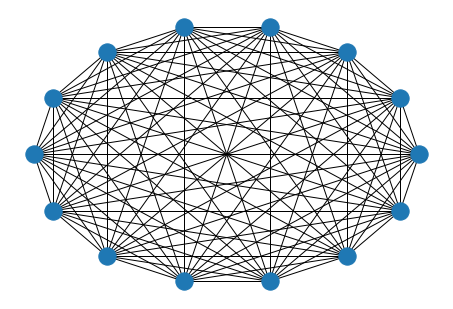

The memory used by the graph in Bytes is: 56


In [19]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [20]:
ranks = nx.pagerank(nx_graph)
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))
for i in ranks:
    print(i, ranks[i])


<class 'dict'>
The size used by the dictionary in Bytes is: 648
0 0.0846446775820967
1 0.0678415270105889
2 0.07742824172946891
3 0.07914729453053353
4 0.06652946807800773
5 0.06465279506880184
6 0.08516508894349534
7 0.06449223449321992
8 0.06316721285216859
9 0.08256729739807517
10 0.06805192564792718
11 0.06647801344784705
12 0.06084542950162328
13 0.06898879371614594


In [21]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [22]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [23]:
print(rank_max)
print(rank_min)

0.08516508894349534
0.06084542950162328


In [24]:
temp_array = []
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

14


In [25]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [26]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [27]:
model = sentence_list

In [28]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
f = open('final3.txt', 'a+')
f.write('\n')
f.write(summary)
f.close

`` the staggering number of dead bodies found in damasak is a testimony of the large-scale atrocity boko haram committed when they were in control of the town '' kyari added . kano , nigeria ( cnn ) hundreds of decomposed corpses were discovered buried in shallow graves in the streets of the northeastern nigerian town of damasak this past weekend , according to local officials and a resident . `` ‎we collected over 400 corpses from the streets and in shallow graves during our visit in damasak , '' said idris karimbe , one of the volunteers who took part in the burial . `` we found hundreds of dead bodies in shallow graves and on the streets of damasak during our visit , '' damasak local government spokesman babagana mustapha told cnn on monday . a provincial government committee was visiting the area as part of an effort to assess the level of destruction in towns that had been in the deadly grip of boko haram .


<function TextIOWrapper.close()>

In [29]:
for lines in sentence_list:
    print(lines)

`` the staggering number of dead bodies found in damasak is a testimony of the large-scale atrocity boko haram committed when they were in control of the town '' kyari added .
kano , nigeria ( cnn ) hundreds of decomposed corpses were discovered buried in shallow graves in the streets of the northeastern nigerian town of damasak this past weekend , according to local officials and a resident .
`` ‎we collected over 400 corpses from the streets and in shallow graves during our visit in damasak , '' said idris karimbe , one of the volunteers who took part in the burial .
`` we found hundreds of dead bodies in shallow graves and on the streets of damasak during our visit , '' damasak local government spokesman babagana mustapha told cnn on monday .
a provincial government committee was visiting the area as part of an effort to assess the level of destruction in towns that had been in the deadly grip of boko haram .


In [29]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from pythonrouge.pythonrouge import Pythonrouge
from pprint import pprint

if __name__ == '__main__':
    summary = './sample/summary/'
    reference = './sample/reference/'
    print('evaluate sumamry & reference in these dirs')
    print('summary:\t{}\nreference:\t{}'.format(summary, reference))
    rouge = Pythonrouge(summary_file_exist=True,
                        peer_path=summary, model_path=reference,
                        n_gram=2, ROUGE_SU4=True, ROUGE_L=False,
                        recall_only=False, f_measure_only=False,
                        stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=True, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)
    score = rouge.calc_score()
    print('ROUGE-N(1-2) & SU4 recall & f-measure with confidence interval')
    pprint(score)
    print('Evaluate ROUGE based on sentecnce lists')
    """
    ROUGE evaluates all system summaries and its corresponding reference
    a summary or summaries at onece.
    Summary should be double list, in each list has each summary.
    Reference summaries should be triple list because some of reference
    has multiple gold summaries.
    """
    summary = [["Donor exits can create shocks to a country's health system affecting ",
                "The loss of external support can lead to gaps in staffing and technical capacity",
                "Governments of MICs can draw on an expanding evidence base on how to raise "],
               ["The second component of a joined-up approach would be a health financing ",
                "MICs need a joined-up approach to transition"]]
    reference = [
                 [["Donor exits can create shocks to a country's health system affecting \
human resources for health, service delivery, medicines and technologies"],
                  ["A fourth, related transition is the new focus within the global health community on domestic resource mobilization for health "],
                  ["Yet many countries have so far seen little or no mobilization of domestic resources",
                  "To give one example, Ghana, which is currently \
in Gavis preparatory transition phase"]],
                 [["The second component of a joined-up approach \
would be a health financing revolutioninvolving sustained domestic",
                   "Finally, the international community can support transitioning MICs \
through providing global public goods for health"],
                  ["other health technologies, and (iii) tackling\
 global antimicrobial resistance",
                   "MICs themselves should, of course, be in the driving seat \
when it comes to leading such strategy development",
                   "By anticipating the disease and demographic trends ahead and what these mean for future \
                   financing needs"],
                  [" mobilizing the required resources to fund the right health benefits packages,",
                  "supporting intersectoral policies for health improvement"],
                  ["MICs could see a health transformation in the SDGs era",
                  "international community can support transitioning MICs through providing global public goods for health"]]
                  ]
    rouge = Pythonrouge(summary_file_exist=False,
                        summary=summary, reference=reference,
                        n_gram=2, ROUGE_SU4=True, ROUGE_L=False,
                        recall_only=True, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=True, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)
    score = rouge.calc_score()
    print('ROUGE-N(1-2) & SU4 recall only with confidence interval')
    pprint(score)

evaluate sumamry & reference in these dirs
summary:	./sample/summary/
reference:	./sample/reference/
ROUGE-N(1-2) & SU4 recall & f-measure with confidence interval
{}
Evaluate ROUGE based on sentecnce lists
ROUGE-N(1-2) & SU4 recall only with confidence interval
{'ROUGE-1': 0.24495,
 'ROUGE-1-cf95': (0.21212, 0.27778),
 'ROUGE-2': 0.13832,
 'ROUGE-2-cf95': (0.06452, 0.21212),
 'ROUGE-SU4': 0.13579,
 'ROUGE-SU4-cf95': (0.06325, 0.20833)}
